<a href="https://colab.research.google.com/github/AnnaEbenezar/CODING/blob/main/Year%203/Machine%20Learning/ML_L02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""
#ALTERNATIVE - import directly into colab content file
import pandas as pd

housing = pd.read_csv("/content/housing.csv")
housing.head()
"""

# Look at The Big Picture: Get Data

In [ ]:
import pandas as pd

housing = pd.read_csv("/content/drive/MyDrive/Year 3/Semester 1/Machine Learning/Colab Data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


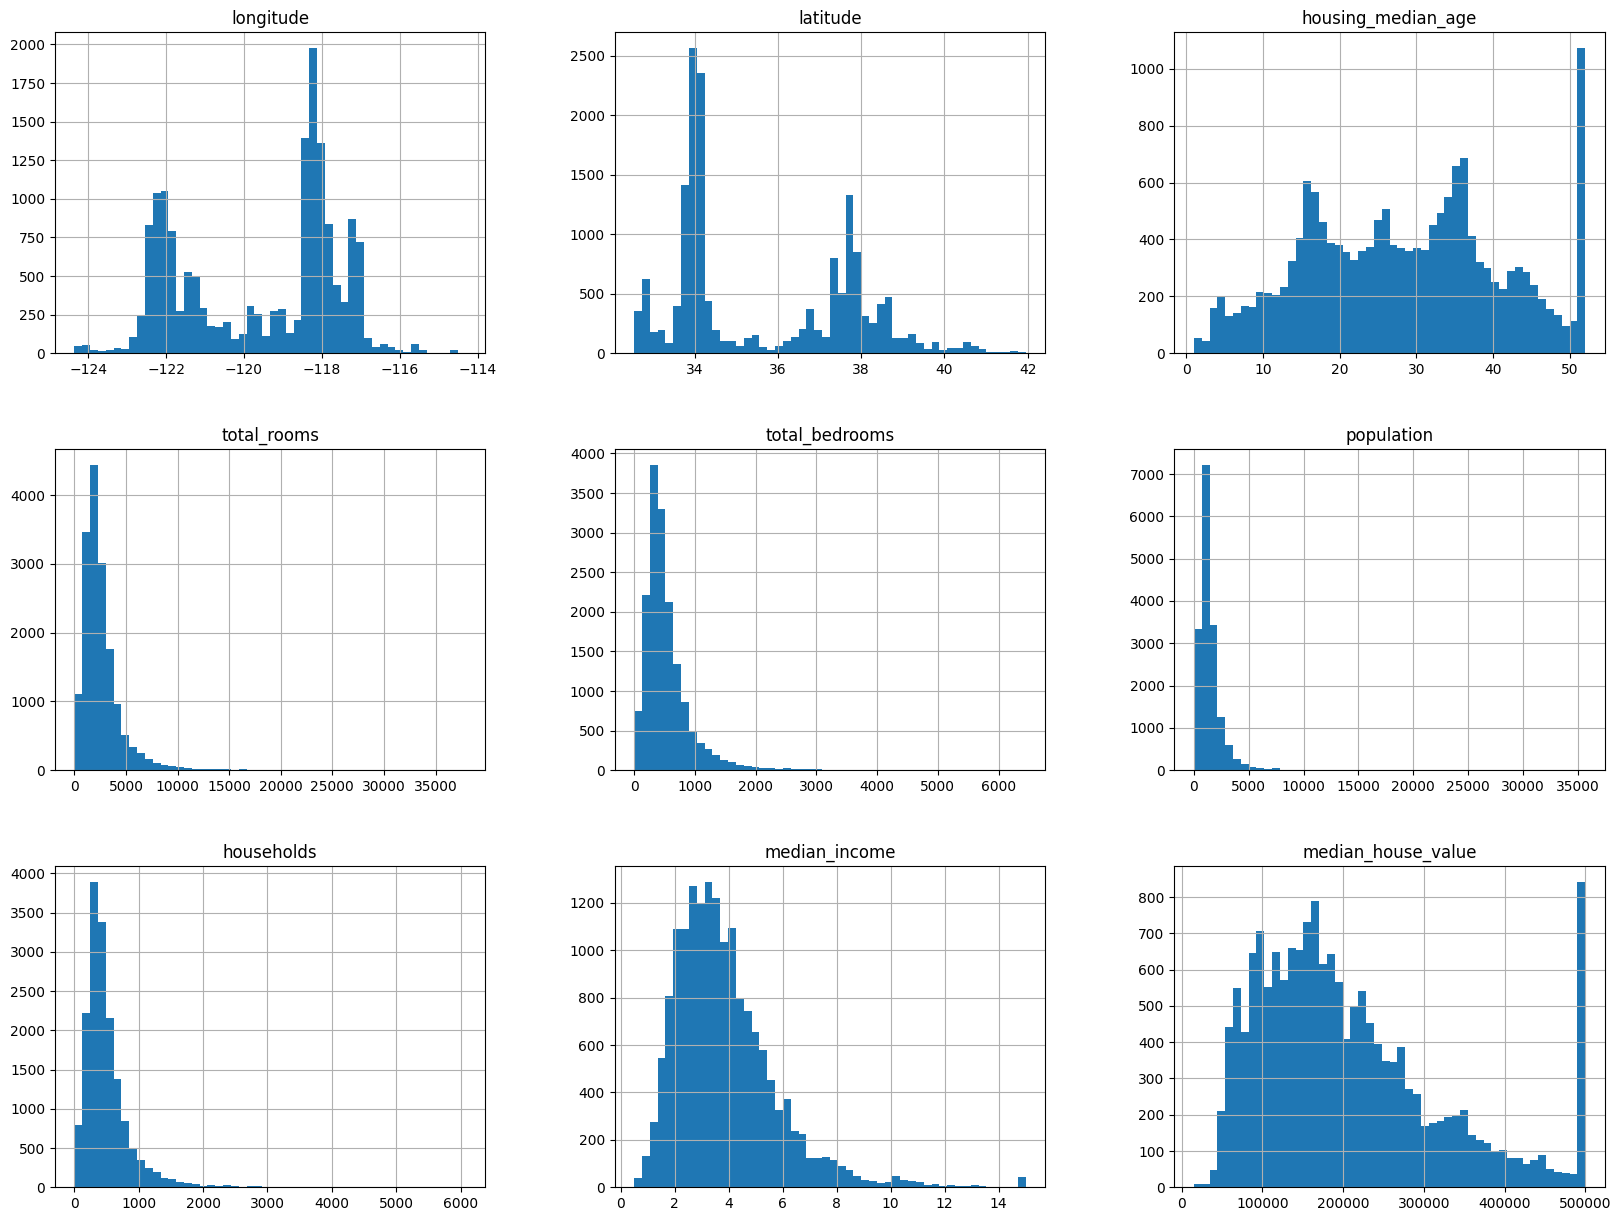

In [ ]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

# Looking at the Big Picture: Create a Test Set

In [ ]:
import numpy as np

def split_train_test(data, test_ratio):
  np.random.seed(393)
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [ ]:
len(test_set)

4128

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,
                                       test_size = 0.2,
                                       random_state= 42)

In [ ]:
len(train_set)

16512

In [ ]:
len(test_set)

4128

<Axes: >

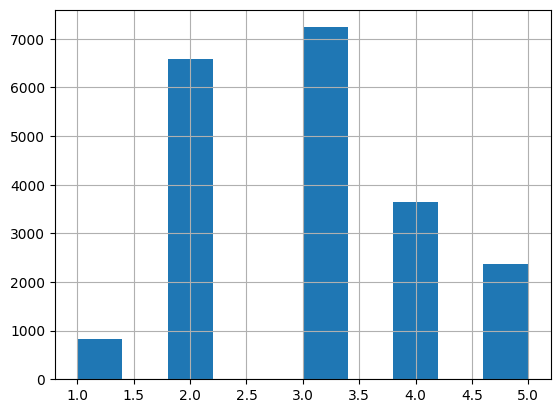

In [ ]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1,
                               test_size = 0.2,
                               random_state= 393)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

# Discover and Visualize the Data to Gain Insights

In [ ]:
housing = strat_train_set.copy()

## Visualizing Geographical Data

<Axes: xlabel='longitude', ylabel='latitude'>

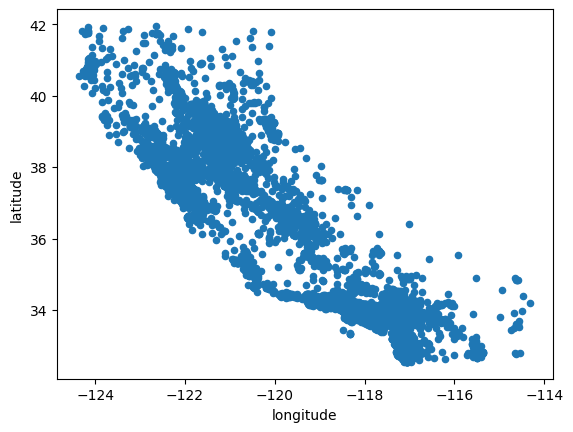

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

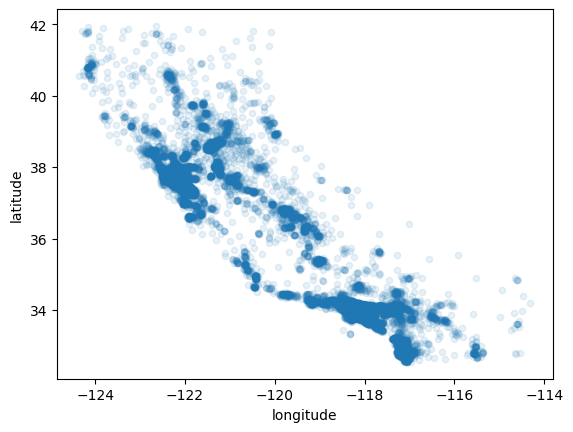

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

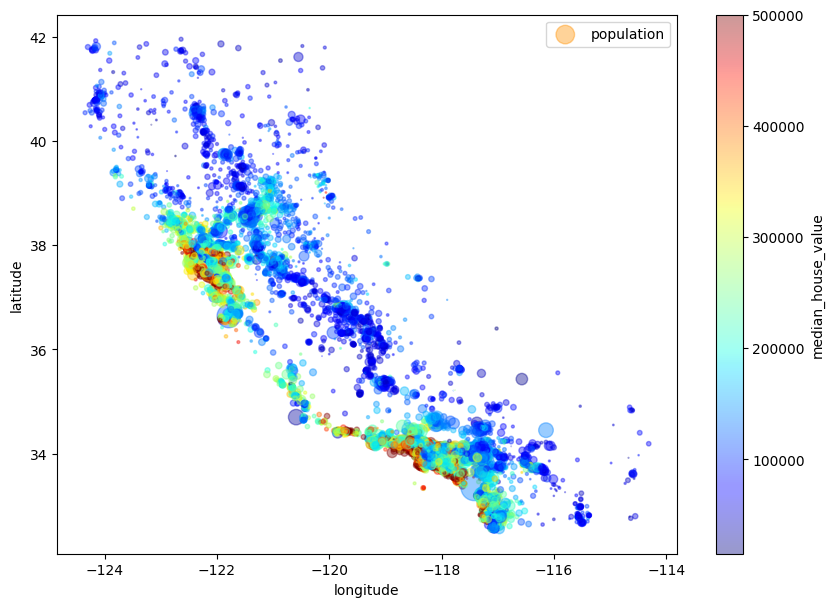

In [ ]:
housing.plot(kind='scatter',
             x='longitude',
             y='latitude',
             alpha = 0.4,
             s=housing['population']/100,
             label = 'population',
             figsize = (10,7),
             c = 'median_house_value',
             cmap = plt.get_cmap("jet"),
             colorbar=True)
plt.legend()

## Looking for Correlations

In [ ]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-29-2df75c723d39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.693135
total_rooms           0.131371
housing_median_age    0.106674
households            0.062932
total_bedrooms        0.047206
population           -0.028884
longitude            -0.044601
latitude             -0.146559
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

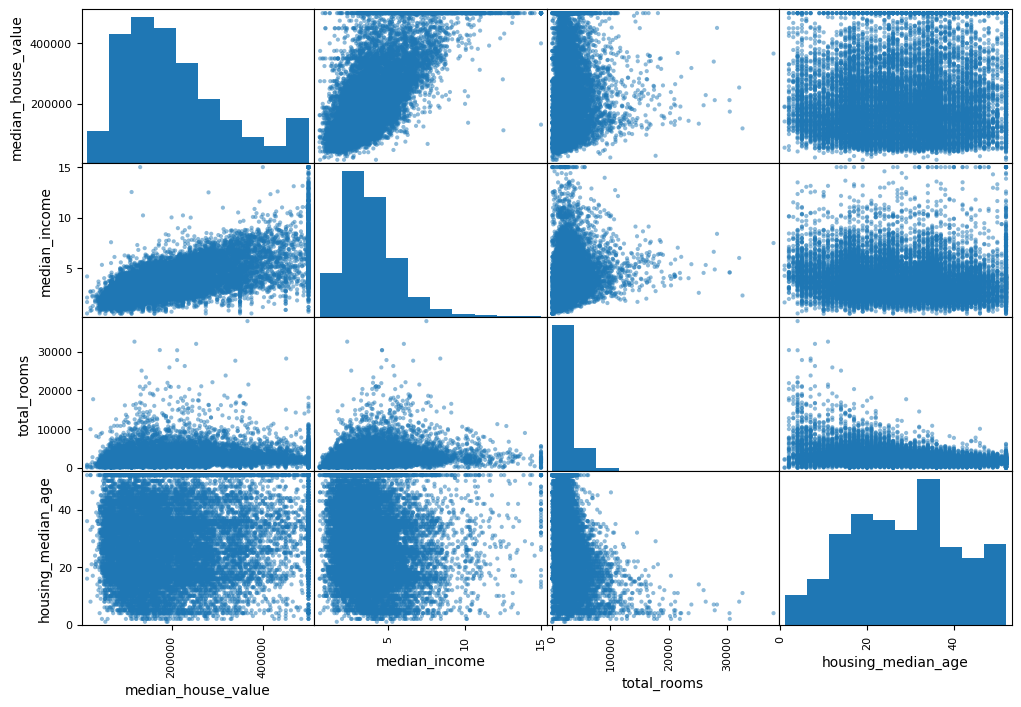

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income',
              'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

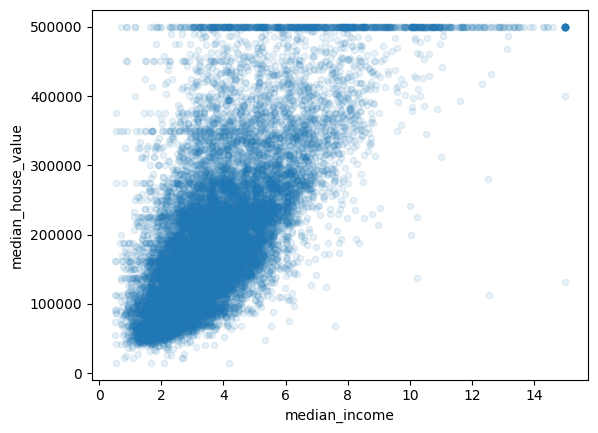

In [ ]:
housing.plot(kind='scatter', x='median_income',
             y='median_house_value', alpha=0.1)

## Experimenting with Attribute Combinations

In [ ]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-33-e716c6ebc584>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.693135
rooms_per_household         0.149758
total_rooms                 0.131371
housing_median_age          0.106674
households                  0.062932
total_bedrooms              0.047206
population_per_household   -0.027107
population                 -0.028884
longitude                  -0.044601
latitude                   -0.146559
bedrooms_per_room          -0.262142
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [ ]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

## Data Cleaning

In [ ]:
'''
# take out some rows
housing.dropna(subset=['total_bedrooms']) # option 1
# take out the entire column
housing.drop('total_bedrooms', axis=1) # option 2
# fill in the values (using median)
media = housing['total_bedrooms'].median # option 3
housing['total_bedrooms'].fillna(median, inplace=True)
'''

In [ ]:
#option 3
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
x = imputer.transform(housing_num)
x

array([[-117.96  ,   33.9   ,    9.    , ...,  293.    ,    7.2532,
           5.    ],
       [-122.69  ,   38.34  ,   16.    , ...,  327.    ,    3.2857,
           3.    ],
       [-117.46  ,   34.08  ,   18.    , ...,  702.    ,    3.6602,
           3.    ],
       ...,
       [-121.61  ,   39.13  ,   33.    , ...,  504.    ,    1.4727,
           1.    ],
       [-118.19  ,   34.11  ,   38.    , ...,  322.    ,    2.286 ,
           2.    ],
       [-118.26  ,   33.78  ,   36.    , ...,  692.    ,    2.1311,
           2.    ]])

In [ ]:
housing_tr = pd.DataFrame(x, columns = housing_num.columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-117.96,33.90,9.0,1899.0,284.0,1070.0,293.0,7.2532,5.0
1,-122.69,38.34,16.0,1683.0,341.0,880.0,327.0,3.2857,3.0
2,-117.46,34.08,18.0,3830.0,750.0,2767.0,702.0,3.6602,3.0
3,-118.24,33.95,37.0,441.0,125.0,390.0,98.0,1.6513,2.0
4,-122.31,38.33,26.0,2155.0,339.0,956.0,365.0,4.0132,3.0
